In [1]:
import numpy as np
import matplotlib.pyplot as plt


raw_rewards = np.random.normal(1, 1, 1000)

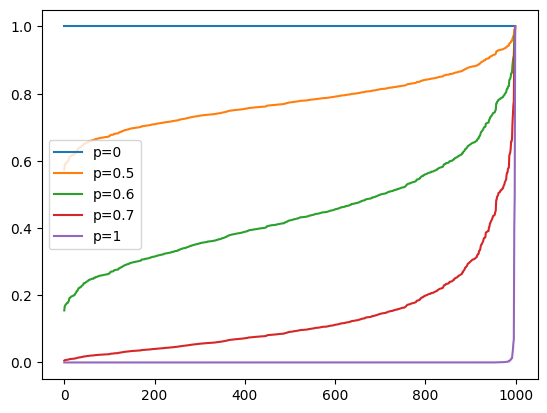

In [2]:
def apply_reward_func(raw_rewards, p):
    exponent = (p**6.64385619)*100 # 6.64385619 = ln(100)/ln(2) -> this way if p=0.5, the exponent is exatly 1
    positive_rewards = np.clip(raw_rewards, 0, np.inf)
    normalised_rewards = positive_rewards / np.max(positive_rewards)
    post_func_rewards = normalised_rewards ** exponent
    all_rewards = post_func_rewards
    all_rewards[raw_rewards < 0] = 0
    return all_rewards

raw_rewards = np.random.normal(1, 0.1, 1000)
for p in [0, 0.5, 0.6, 0.7, 1]:
    plt.plot(sorted(apply_reward_func(raw_rewards, p=p)), label=f"p={p}")
plt.legend()

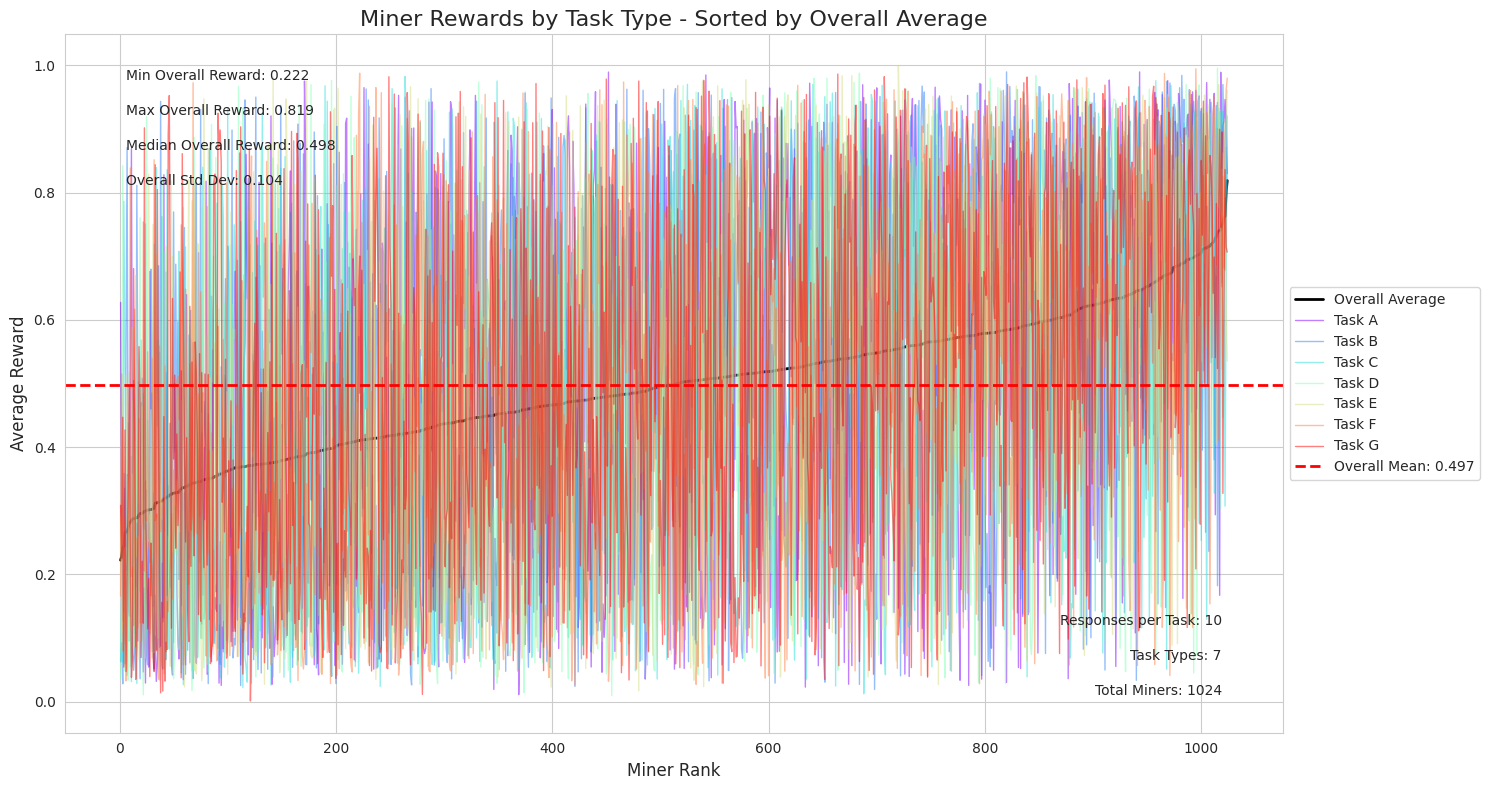

Overall Minimum Reward: 0.222
Overall Maximum Reward: 0.819
Overall Median Reward: 0.498
Overall Mean Reward: 0.497
Overall Standard Deviation: 0.104
Overall 10th Percentile: 0.365
Overall 90th Percentile: 0.633

Task-specific statistics:

Task A:
  Minimum Reward: 0.011
  Maximum Reward: 0.990
  Mean Reward: 0.505
  Standard Deviation: 0.283

Task B:
  Minimum Reward: 0.019
  Maximum Reward: 0.990
  Mean Reward: 0.505
  Standard Deviation: 0.282

Task C:
  Minimum Reward: 0.012
  Maximum Reward: 0.982
  Mean Reward: 0.497
  Standard Deviation: 0.283

Task D:
  Minimum Reward: 0.009
  Maximum Reward: 0.995
  Mean Reward: 0.490
  Standard Deviation: 0.291

Task E:
  Minimum Reward: 0.017
  Maximum Reward: 0.999
  Mean Reward: 0.504
  Standard Deviation: 0.281

Task F:
  Minimum Reward: 0.026
  Maximum Reward: 0.994
  Mean Reward: 0.482
  Standard Deviation: 0.274

Task G:
  Minimum Reward: 0.001
  Maximum Reward: 0.986
  Mean Reward: 0.494
  Standard Deviation: 0.282


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Constants
NUM_MINERS = 1024
NUM_TASK_TYPES = 7
NUM_RESPONSES_PER_TASK = 10

# Generate random means for each miner for each task type (between 0 and 1)
miner_task_means = np.random.uniform(0, 1, (NUM_MINERS, NUM_TASK_TYPES))

# Generate rewards for each miner, task type, and response
rewards = np.zeros((NUM_MINERS, NUM_TASK_TYPES, NUM_RESPONSES_PER_TASK))

for i in range(NUM_MINERS):
    for j in range(NUM_TASK_TYPES):
        rewards[i, j, :] = np.random.normal(miner_task_means[i, j], 0.1, NUM_RESPONSES_PER_TASK)

# Clip rewards to be between 0 and 1
rewards = np.clip(rewards, 0, 1)

# Calculate the final reward for each miner for each task type
final_rewards_per_task = rewards.mean(axis=2)

# Calculate the overall average reward for each miner
overall_average_rewards = final_rewards_per_task.mean(axis=1)

# Sort miners by their overall average reward
sorted_indices = np.argsort(overall_average_rewards)
sorted_overall_rewards = overall_average_rewards[sorted_indices]
sorted_task_rewards = final_rewards_per_task[sorted_indices]

# Create the plot
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")

# Plot the sorted overall rewards
plt.plot(range(1, NUM_MINERS + 1), sorted_overall_rewards, color='black', linewidth=2, label='Overall Average')

# Plot the sorted rewards for each task type
colors = plt.cm.rainbow(np.linspace(0, 1, NUM_TASK_TYPES))
for i in range(NUM_TASK_TYPES):
    plt.plot(range(1, NUM_MINERS + 1), sorted_task_rewards[:, i], color=colors[i], alpha=0.5, linewidth=1, label=f'Task {chr(65+i)}')

plt.title('Miner Rewards by Task Type - Sorted by Overall Average', fontsize=16)
plt.xlabel('Miner Rank', fontsize=12)
plt.ylabel('Average Reward', fontsize=12)

# Add a horizontal line for the mean overall reward
mean_overall_reward = overall_average_rewards.mean()
plt.axhline(mean_overall_reward, color='red', linestyle='dashed', linewidth=2, label=f'Overall Mean: {mean_overall_reward:.3f}')

# Add text annotations
plt.text(0.95, 0.05, f'Total Miners: {NUM_MINERS}', transform=plt.gca().transAxes, ha='right', va='bottom', fontsize=10)
plt.text(0.95, 0.10, f'Task Types: {NUM_TASK_TYPES}', transform=plt.gca().transAxes, ha='right', va='bottom', fontsize=10)
plt.text(0.95, 0.15, f'Responses per Task: {NUM_RESPONSES_PER_TASK}', transform=plt.gca().transAxes, ha='right', va='bottom', fontsize=10)

# Add more detailed statistics
plt.text(0.05, 0.95, f"Min Overall Reward: {sorted_overall_rewards.min():.3f}", transform=plt.gca().transAxes, ha='left', va='top', fontsize=10)
plt.text(0.05, 0.90, f"Max Overall Reward: {sorted_overall_rewards.max():.3f}", transform=plt.gca().transAxes, ha='left', va='top', fontsize=10)
plt.text(0.05, 0.85, f"Median Overall Reward: {np.median(sorted_overall_rewards):.3f}", transform=plt.gca().transAxes, ha='left', va='top', fontsize=10)
plt.text(0.05, 0.80, f"Overall Std Dev: {sorted_overall_rewards.std():.3f}", transform=plt.gca().transAxes, ha='left', va='top', fontsize=10)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

# Display the plot
plt.show()

# Print some additional statistics
print(f"Overall Minimum Reward: {sorted_overall_rewards.min():.3f}")
print(f"Overall Maximum Reward: {sorted_overall_rewards.max():.3f}")
print(f"Overall Median Reward: {np.median(sorted_overall_rewards):.3f}")
print(f"Overall Mean Reward: {mean_overall_reward:.3f}")
print(f"Overall Standard Deviation: {sorted_overall_rewards.std():.3f}")
print(f"Overall 10th Percentile: {np.percentile(sorted_overall_rewards, 10):.3f}")
print(f"Overall 90th Percentile: {np.percentile(sorted_overall_rewards, 90):.3f}")

print("\nTask-specific statistics:")
for i in range(NUM_TASK_TYPES):
    task_rewards = sorted_task_rewards[:, i]
    print(f"\nTask {chr(65+i)}:")
    print(f"  Minimum Reward: {task_rewards.min():.3f}")
    print(f"  Maximum Reward: {task_rewards.max():.3f}")
    print(f"  Mean Reward: {task_rewards.mean():.3f}")
    print(f"  Standard Deviation: {task_rewards.std():.3f}")

/tmp/ipykernel_1967774/830500118.py:56: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, _ = spearmanr(overall_average_rewards_original, overall_average_rewards_new)


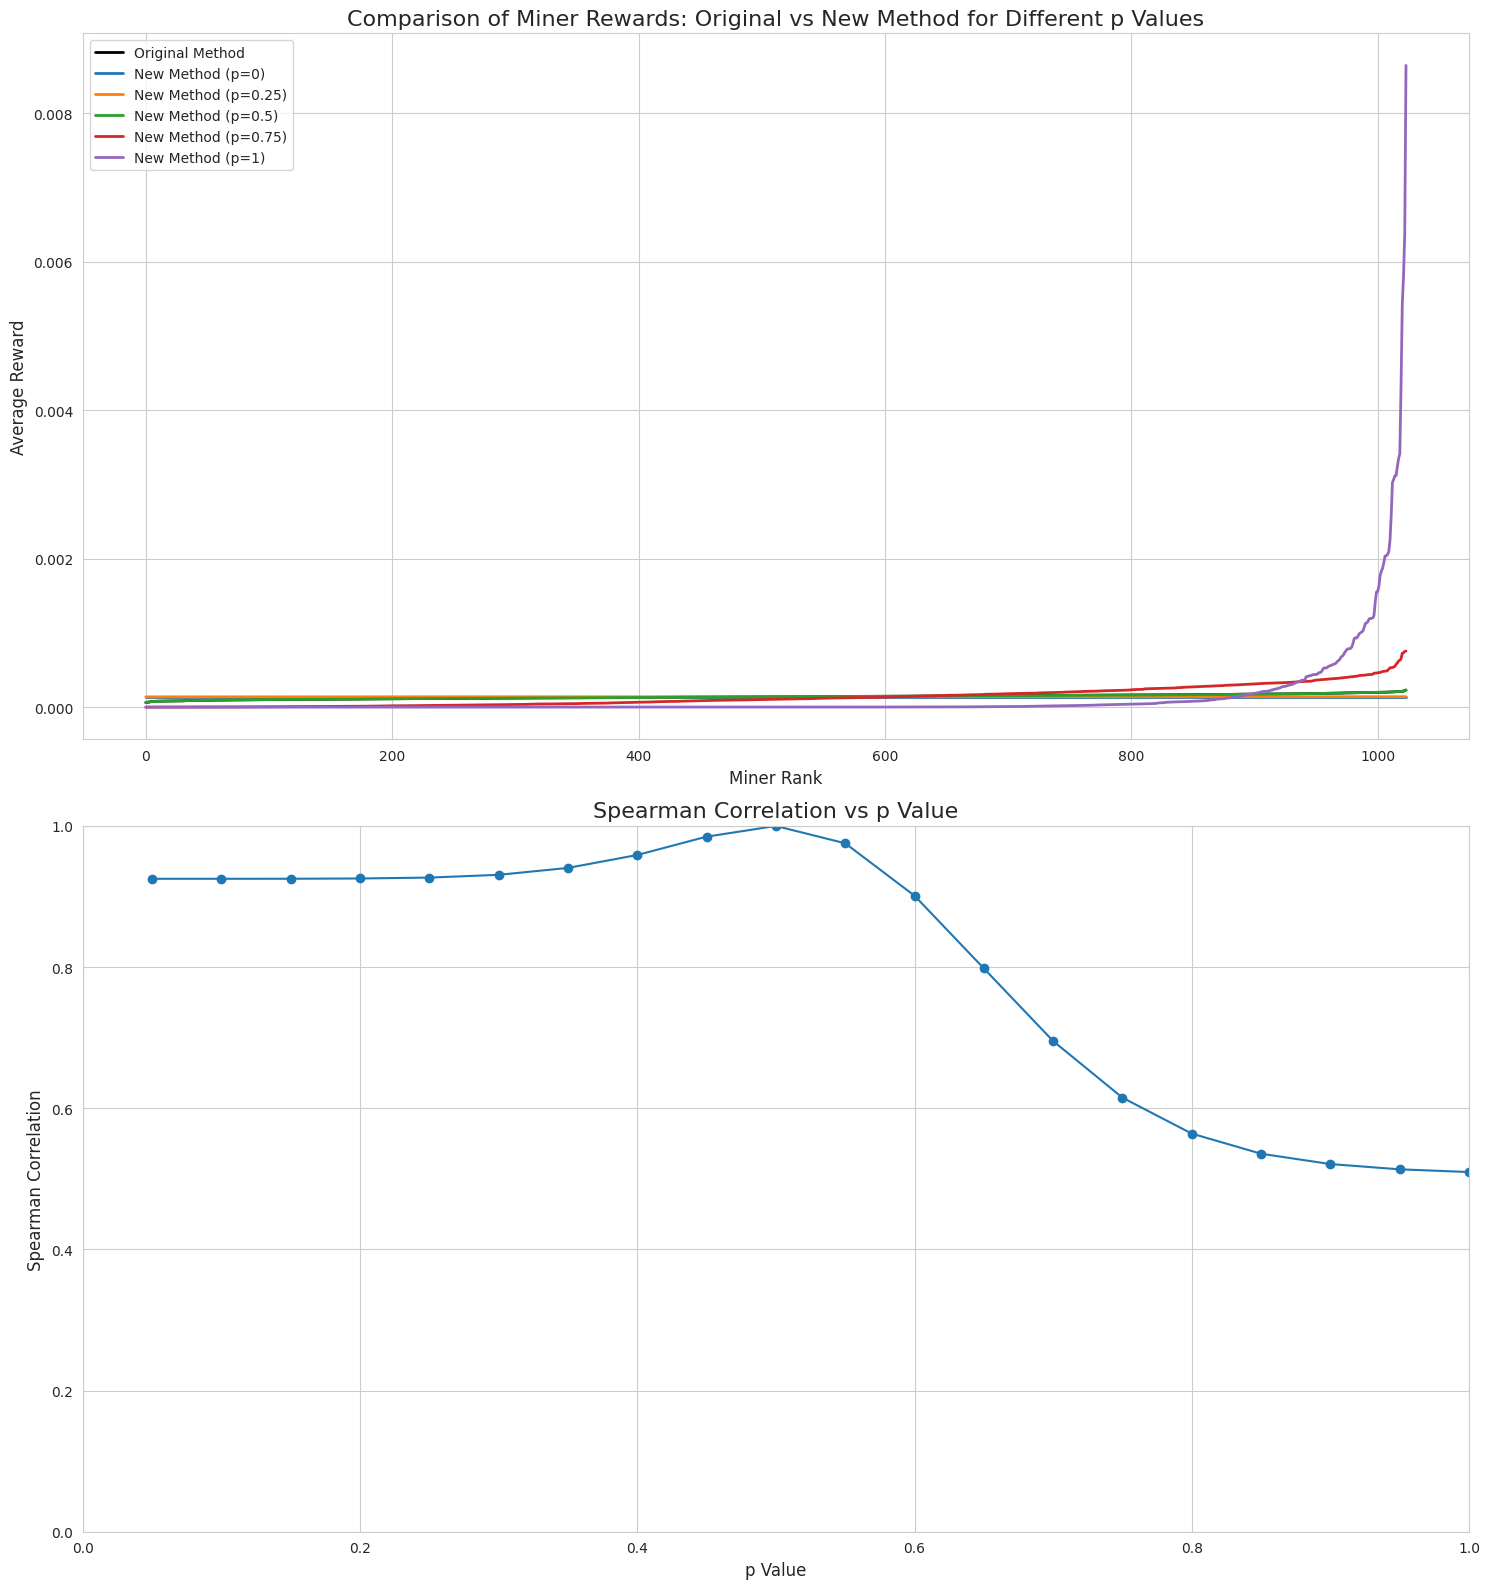

Spearman Correlations between Original and New Method:
p = 0.00: nan
p = 0.25: 0.9267
p = 0.50: 0.9998
p = 0.75: 0.6149
p = 1.00: 0.5096

Additional Statistics:

p = 0.00:
  Min: 0.00014
  Max: 0.00014
  Mean: 0.00014
  Median: 0.00014
  Std Dev: 0.00000
  10th Percentile: 0.00014
  90th Percentile: 0.00014

p = 0.25:
  Min: 0.00014
  Max: 0.00014
  Mean: 0.00014
  Median: 0.00014
  Std Dev: 0.00000
  10th Percentile: 0.00014
  90th Percentile: 0.00014

p = 0.50:
  Min: 0.00006
  Max: 0.00023
  Mean: 0.00014
  Median: 0.00014
  Std Dev: 0.00003
  10th Percentile: 0.00010
  90th Percentile: 0.00018

p = 0.75:
  Min: 0.00000
  Max: 0.00075
  Mean: 0.00014
  Median: 0.00011
  Std Dev: 0.00013
  10th Percentile: 0.00000
  90th Percentile: 0.00033

p = 1.00:
  Min: 0.00000
  Max: 0.00864
  Mean: 0.00014
  Median: 0.00000
  Std Dev: 0.00057
  10th Percentile: 0.00000
  90th Percentile: 0.00026


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Set random seed for reproducibility
np.random.seed(42)

# Constants
NUM_MINERS = 1024
NUM_TASK_TYPES = 7
NUM_RESPONSES_PER_TASK = 10

def apply_reward_func(raw_rewards, p):
    exponent = (p**6.64385619)*100
    positive_rewards = np.clip(raw_rewards, 0, np.inf)
    normalised_rewards = positive_rewards / np.max(positive_rewards)
    post_func_rewards = normalised_rewards ** exponent
    all_rewards = post_func_rewards
    all_rewards[raw_rewards < 0] = 0
    return all_rewards

# Generate random means for each miner for each task type (between 0 and 1)
miner_task_means = np.random.uniform(0, 1, (NUM_MINERS, NUM_TASK_TYPES))

# Generate rewards for each miner, task type, and response
rewards = np.zeros((NUM_MINERS, NUM_TASK_TYPES, NUM_RESPONSES_PER_TASK))
for i in range(NUM_MINERS):
    for j in range(NUM_TASK_TYPES):
        rewards[i, j, :] = np.random.normal(miner_task_means[i, j], 0.1, NUM_RESPONSES_PER_TASK)

# Clip rewards to be between 0 and 1
rewards = np.clip(rewards, 0, 1)

# Calculate the final reward for each miner for each task type (original method)
final_rewards_per_task_original = rewards.mean(axis=2)
final_rewards_per_task_original = final_rewards_per_task_original / (np.sum(final_rewards_per_task_original) + 1e-10)
overall_average_rewards_original = final_rewards_per_task_original.mean(axis=1)

# Calculate rewards for different p values
p_values = np.linspace(0, 1, 21)  # 21 points from 0 to 1, inclusive
new_rewards = {}
correlations = {}

for p in p_values:
    final_rewards_per_task_new = np.zeros((NUM_MINERS, NUM_TASK_TYPES))
    for j in range(NUM_TASK_TYPES):
        task_rewards = rewards[:, j, :].mean(axis=1)
        final_rewards_per_task_new[:, j] = apply_reward_func(task_rewards, p=p)
        final_rewards_per_task_new[:, j] /= final_rewards_per_task_new[:, j].sum()
    
    overall_average_rewards_new = final_rewards_per_task_new.mean(axis=1) * (1/7)
    new_rewards[p] = overall_average_rewards_new
    
    # Calculate Spearman correlation
    correlation, _ = spearmanr(overall_average_rewards_original, overall_average_rewards_new)
    correlations[p] = correlation

# Create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 16))
sns.set_style("whitegrid")

# First subplot: Reward distributions
ax1.plot(np.sort(overall_average_rewards_original), color='black', linewidth=2, label='Original Method')
for p in [0, 0.25, 0.5, 0.75, 1]:
    ax1.plot(np.sort(new_rewards[p]), linewidth=2, label=f'New Method (p={p})')

ax1.set_title('Comparison of Miner Rewards: Original vs New Method for Different p Values', fontsize=16)
ax1.set_xlabel('Miner Rank', fontsize=12)
ax1.set_ylabel('Average Reward', fontsize=12)
ax1.legend()

# Second subplot: p vs Spearman correlation
ax2.plot(p_values, [correlations[p] for p in p_values], marker='o')
ax2.set_title('Spearman Correlation vs p Value', fontsize=16)
ax2.set_xlabel('p Value', fontsize=12)
ax2.set_ylabel('Spearman Correlation', fontsize=12)
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print detailed correlation information
print("Spearman Correlations between Original and New Method:")
for p in [0, 0.25, 0.5, 0.75, 1]:
    print(f"p = {p:.2f}: {correlations[p]:.4f}")

# Calculate and print additional statistics
print("\nAdditional Statistics:")
for p in [0, 0.25, 0.5, 0.75, 1]:
    rewards = new_rewards[p]
    print(f"\np = {p:.2f}:")
    print(f"  Min: {rewards.min():.5f}")
    print(f"  Max: {rewards.max():.5f}")
    print(f"  Mean: {rewards.mean():.5f}")
    print(f"  Median: {np.median(rewards):.5f}")
    print(f"  Std Dev: {rewards.std():.5f}")
    print(f"  10th Percentile: {np.percentile(rewards, 10):.5f}")
    print(f"  90th Percentile: {np.percentile(rewards, 90):.5f}")

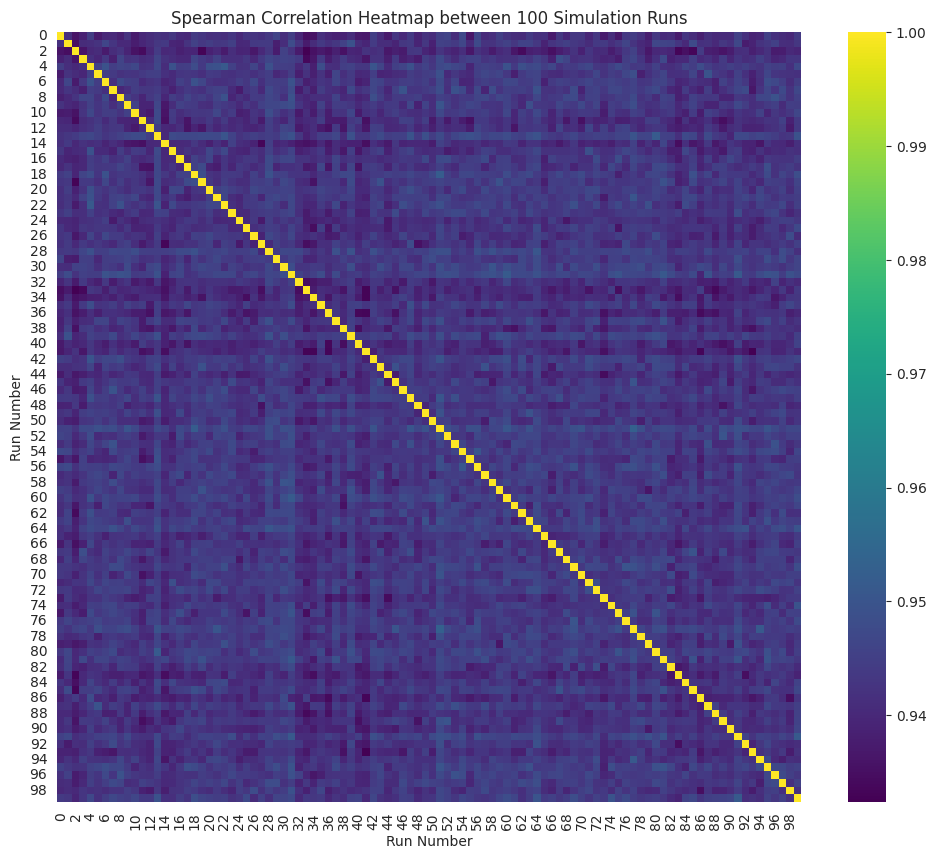

Mean correlation: 0.9429
Median correlation: 0.9430
Min correlation: 0.9324
Max correlation: 0.9527
Standard deviation of correlations: 0.0029


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

def run_simulation(miner_task_means):
    # Constants
    NUM_MINERS = 1024
    NUM_TASK_TYPES = 7
    NUM_RESPONSES_PER_TASK = 2

    def apply_reward_func(raw_rewards, p):
        exponent = (p**6.64385619)*100
        positive_rewards = np.clip(raw_rewards, 0, np.inf)
        normalised_rewards = positive_rewards / np.max(positive_rewards)
        post_func_rewards = normalised_rewards ** exponent
        all_rewards = post_func_rewards
        all_rewards[raw_rewards < 0] = 0
        return all_rewards

    # Generate random means for each miner for each task type (between 0 and 1)

    # Generate rewards for each miner, task type, and response
    rewards = np.zeros((NUM_MINERS, NUM_TASK_TYPES, NUM_RESPONSES_PER_TASK))
    for i in range(NUM_MINERS):
        for j in range(NUM_TASK_TYPES):
            rewards[i, j, :] = np.random.normal(miner_task_means[i, j], 0.1, NUM_RESPONSES_PER_TASK)

    # Clip rewards to be between 0 and 1
    rewards = np.clip(rewards, 0, 1)

    # Calculate rewards for p=0.5
    p = 0.5
    final_rewards_per_task_new = np.zeros((NUM_MINERS, NUM_TASK_TYPES))
    for j in range(NUM_TASK_TYPES):
        task_rewards = rewards[:, j, :].mean(axis=1)
        final_rewards_per_task_new[:, j] = apply_reward_func(task_rewards, p=p)
        final_rewards_per_task_new[:, j] /= final_rewards_per_task_new[:, j].sum()
    
    overall_average_rewards = final_rewards_per_task_new.mean(axis=1) * (1/7)
    return overall_average_rewards

# Run the simulation 100 times
num_runs = 100
miner_task_means = np.random.uniform(0, 1, (NUM_MINERS, NUM_TASK_TYPES))

all_rewards = [run_simulation(miner_task_means) for _ in range(num_runs)]

# Calculate correlations between all pairs of runs
correlations = np.zeros((num_runs, num_runs))
for i in range(num_runs):
    for j in range(i, num_runs):
        corr, _ = spearmanr(all_rewards[i], all_rewards[j])
        correlations[i, j] = corr
        correlations[j, i] = corr

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, cmap='viridis', vmin=np.min(correlations), vmax=1)
plt.title('Spearman Correlation Heatmap between 100 Simulation Runs')
plt.xlabel('Run Number')
plt.ylabel('Run Number')
plt.show()

# Calculate and print statistics
flat_corr = correlations[np.triu_indices(num_runs, k=1)]
print(f"Mean correlation: {np.mean(flat_corr):.4f}")
print(f"Median correlation: {np.median(flat_corr):.4f}")
print(f"Min correlation: {np.min(flat_corr):.4f}")
print(f"Max correlation: {np.max(flat_corr):.4f}")
print(f"Standard deviation of correlations: {np.std(flat_corr):.4f}")